P matrix= [[0.47532199 0.37532199 0.28532199]
 [0.37532199 0.37532199 0.28532199]
 [0.28532199 0.28532199 0.28532199]]
F matrix= [[0.20432199 0.20432199 0.20432199]]
d= 4.277897908188878


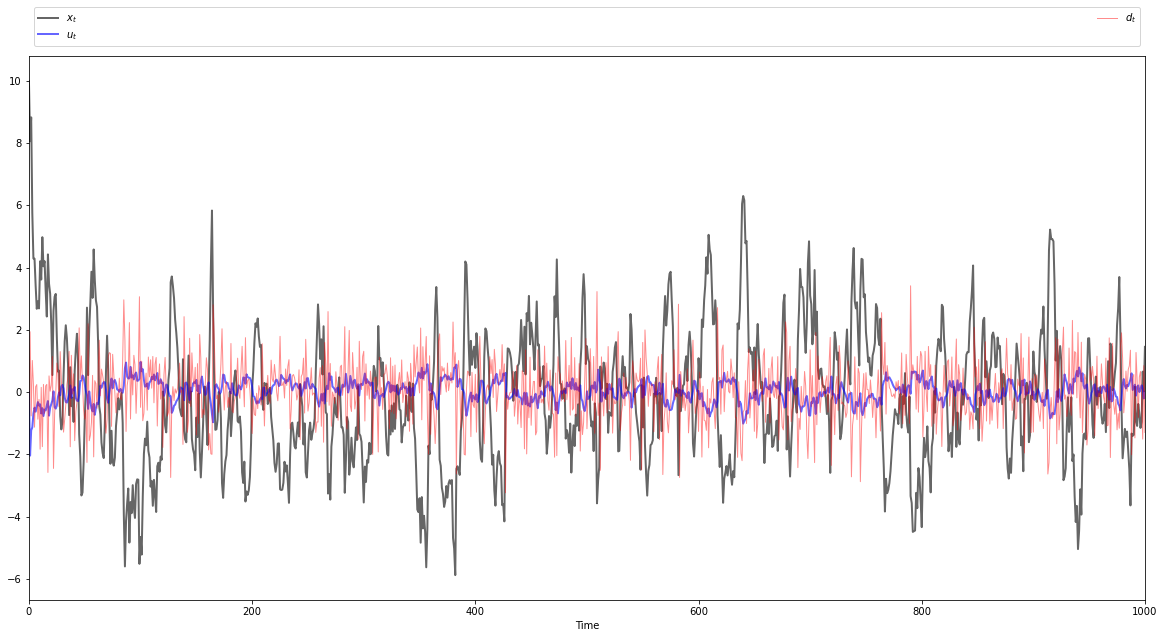

In [6]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""

import numpy as np
import matplotlib.pyplot as plt
from quantecon import LQ

# == Model parameters == #

σ = 1
ρ = 0.1
β = 0.9
T=1000

# == Formulate LQ problem == #
Q = 1
R = [[ρ, 0, 0],
     [0, 0, 0],
     [0,   0,  0]]
A = [[1, 1, 0],
     [0, 0, 1],
     [0, 0, 0]]

B = [[0],
     [0],
     [1]]
C = [[-1*σ],
     [0],
     [0]]

lq = LQ(Q, R, A, B, C=C, beta=β, T=None)

P_s,F_s,d_s = lq.stationary_values(method='doubling')

print("P matrix=",P_s)
print("F matrix=",F_s)
print("d=",d_s)

# == Simulate state / control paths == #
x0 = (10, 0, 0)
for i in range(100):
    xp, up, wp = lq.compute_sequence(x0, T)
    x_t = xp[0, :]
    u_t = np.hstack((0,up.reshape(-1)))
    d_t = wp.reshape(-1)

# == Plot simulation results == #
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlabel('Time')

# == Some fancy plotting stuff -- simplify if you prefer == #
bbox = (0., 1.01, 1., .101)
legend_args = {'bbox_to_anchor' : bbox, 'loc' : 3, 'mode' : 'expand'}
p_args = {'lw' : 2, 'alpha' : 0.6}

time = range(len(x_t))
ax.set_xlim(0, max(time))
ax.plot(time, x_t, 'k-', lw=2, alpha=0.6, label=r'$x_t$')
ax.plot(time, u_t, 'b-', lw=2, alpha=0.6, label=r'$u_t$')
ax.plot(time, d_t, 'r-', lw=1, alpha=0.45, label=r'$d_t$')
ax.legend(ncol=2, **legend_args)

plt.show()
